In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [144]:
#load and read csv file
data_module= pd.read_csv("bike_sharing.csv")
data_module.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [145]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [146]:
data_module.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [147]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['registered','cnt']]

In [148]:
data_module.dtypes

registered    int64
cnt           int64
dtype: object

In [149]:
data_module.isnull().sum()

registered    0
cnt           0
dtype: int64

In [150]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (12165, 2)
test (5214, 2)


In [151]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [152]:
train_module= pd.read_csv("train.csv")
train_module.head()

,registered,cnt
0,226,250
1,16,18
2,90,107
3,126,145
4,758,857


In [153]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [154]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [155]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (8515, 1)
y train data: (8515,)


In [156]:
#feature scalling on training set
sc_x = StandardScaler()
sc_y = StandardScaler()
# x_train= sc_x.fit_transform(x_train)
x_train = sc_x.fit_transform(x_train.reshape(-1, 1) )
y_train = sc_y.fit_transform(y_train.reshape(-1, 1) )
# y_train= sc_y.fit_transform(y_train)

In [157]:
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
cv_data.to_csv('cv_data.csv',index=False)

In [159]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,registered,cnt
0,40,42
1,92,148
2,34,37
3,189,224
4,6,7


In [160]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [161]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3650, 1)
cross validate data y (3650,)


In [162]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
pickle file created
y_predict_train: [-0.3779297   1.0655071  -0.43578777 ...  0.20113363 -0.86651275
 -0.58143207]
Accuracy train data: 94.87977972530663


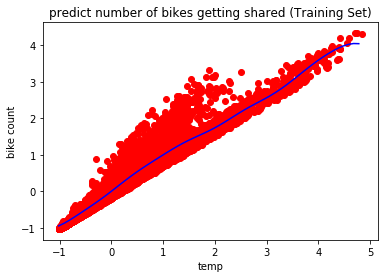

In [163]:
class SVM_problem:
    def svm_model(self,x_train,y_train):
        regressor= SVR(kernel='rbf')
        regression=regressor.fit(x_train,y_train)
        return regression
    
    def pickle_file(self,regression):
        file =open("SupportVector.pkl","wb")
        pickle.dump(regression,file)
        file.close()
    
    def y_predict(self,regression,x_train):
        y_predict = regressor.predict(x_train)
        return y_predict
    
    def accuracy(self,y_predict,y_train):
        accuracy = Accuracy = sklearn.metrics.r2_score(y_train,y_pred_tr)*100
        return accuracy
    
    def visualization(self,x_train,y_train,y_predict_train):
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('temp')
        plt.ylabel('bike count')
        plt.show()

def main():
    obj= SVM_problem()
    regression =obj.svm_model(x_train,y_train)
    print(regression)
    obj.pickle_file(regression)
    print("pickle file created")
    y_predict_train=obj.y_predict(regression,x_train)
    print("y_predict_train:",y_predict_train)
    accuracy= obj.accuracy(y_predict_train,y_train)
    print("Accuracy train data:",accuracy)
    obj.visualization(x_train,y_train,y_predict_train)
if __name__ == '__main__':
    main()
        

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
y_predict train: [-0.73610038 -0.42149681 -0.77064665 ...  0.45113059 -0.78757784
 -0.93045369]
accuracy 94.83509539216843


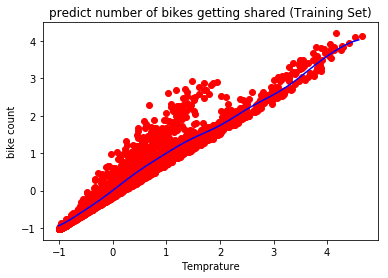

In [164]:
class cross_validation:
    def cv_model(self,cv_data_x,cv_data_y):
        # fitting simple linear regression to the training dataset
        regressor= SVR(kernel='rbf')
        regression=regressor.fit(cv_data_x,cv_data_y)
        return regression
    def y_predict(self,regression,cv_data_x):
        y_predict_test= regressor.predict(cv_data_x)
        return y_predict_test
    
    def accuracy(self,cv_data_y,y_predict_test):
        Accuracy = sklearn.metrics.r2_score(cv_data_y,y_predict_test)*100
        return Accuracy
    def visualization_train(self,cv_data_x,cv_data_y,y_predict_test):
        x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(cv_data_x,cv_data_y,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('Temprature')
        plt.ylabel('bike count')
        plt.show()

def main():
    obj= cross_validation()
    regression=obj.cv_model(cv_data_x,cv_data_y)
    print(regression)
    
    y_predict_test=obj.y_predict(regressor,cv_data_x)
    print("y_predict train:",y_predict_test)
    
    accuracy=obj.accuracy(cv_data_y,y_predict_test)
    print("accuracy",accuracy)

    obj.visualization_train(cv_data_x,cv_data_y,y_predict_test)

if __name__ == '__main__':
    main()
